In [1]:
import zipfile
import os

# Path ke file ZIP
zip_file = 'D:/SEMESTER 7/DAMI/datasets.zip'

# Folder tempat file diekstrak
extract_to = 'D:/SEMESTER 7/DAMI/dataset' 

# Mengekstrak file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset berhasil diekstrak di {extract_to}")

Dataset berhasil diekstrak di D:/SEMESTER 7/DAMI/dataset


In [57]:
!pip install opencv-python


In [58]:
!pip install tensorflow


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import cv2
from collections import Counter
from PIL import Image  
import tensorflow as tf
tf.random.set_seed(1234)

warnings.filterwarnings('ignore')

In [60]:
train_path = "D:/SEMESTER 7/DAMI/dataset/dataset/train"
test_path = "D:/SEMESTER 7/DAMI/dataset/dataset/test"

img_classes = os.listdir(train_path)
print(f"Classes inside the dataset: {img_classes}")

Classes inside the dataset: ['Pinuncaan', 'Ragi Hidup', 'Ragi Hotang', 'Sadum', 'Sibolang', 'Tumtuman']


In [61]:
# Fungsi untuk mendapatkan distribusi jumlah gambar per kelas
def get_class_distribution(path):
    class_counts = {cls: len(os.listdir(os.path.join(path, cls))) for cls in img_classes}
    total_images = sum(class_counts.values())
    return class_counts, total_images

In [62]:
# Menampilkan distribusi dataset
train_distribution, total_train_images = get_class_distribution(train_path)
test_distribution, total_test_images = get_class_distribution(test_path)

print("Train Dataset Distribution:")
for cls, count in train_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Train dataset: {total_train_images}\n")

print("Test Dataset Distribution:")
for cls, count in test_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Test dataset: {total_test_images}\n")

Train Dataset Distribution:
  - Pinuncaan: 134 images
  - Ragi Hidup: 136 images
  - Ragi Hotang: 138 images
  - Sadum: 136 images
  - Sibolang: 135 images
  - Tumtuman: 136 images
Total images in Train dataset: 815

Test Dataset Distribution:
  - Pinuncaan: 67 images
  - Ragi Hidup: 69 images
  - Ragi Hotang: 71 images
  - Sadum: 68 images
  - Sibolang: 71 images
  - Tumtuman: 70 images
Total images in Test dataset: 416



In [63]:
# Analisis ukuran gambar
def get_image_sizes(path):
    image_sizes = []
    for cls in img_classes:
        class_dir = os.path.join(path, cls)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
    return np.array(image_sizes)

train_image_sizes = get_image_sizes(train_path)
avg_width, avg_height = train_image_sizes.mean(axis=0)

print(f"Average image size in Train dataset: {avg_width:.2f} x {avg_height:.2f} pixels")


Average image size in Train dataset: 1880.54 x 2121.09 pixels


In [64]:
print("Test Dataset Distribution:")
for cls, count in test_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Test dataset: {total_test_images}\n")

Test Dataset Distribution:
  - Pinuncaan: 67 images
  - Ragi Hidup: 69 images
  - Ragi Hotang: 71 images
  - Sadum: 68 images
  - Sibolang: 71 images
  - Tumtuman: 70 images
Total images in Test dataset: 416



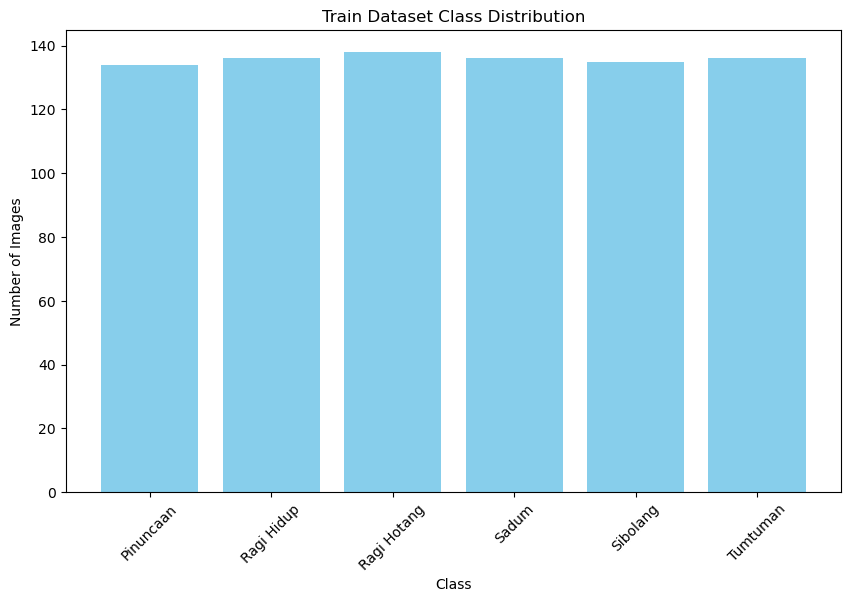

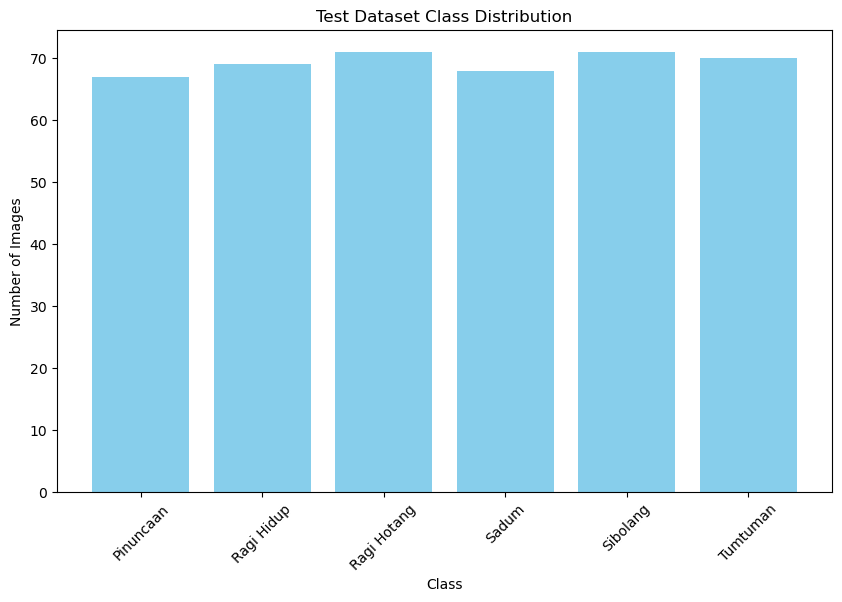

In [65]:
# Visualisasi distribusi kelas
def visualize_class_distribution(distribution, title):
    plt.figure(figsize=(10, 6))
    plt.bar(distribution.keys(), distribution.values(), color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

visualize_class_distribution(train_distribution, "Train Dataset Class Distribution")
visualize_class_distribution(test_distribution, "Test Dataset Class Distribution")


Sample Images from Train Dataset:


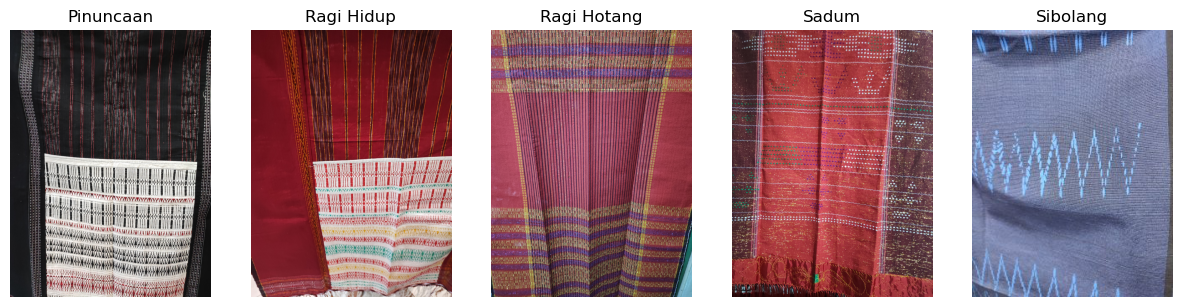

In [66]:
# Menampilkan contoh gambar dari beberapa kelas
def show_sample_images(path):
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(img_classes[:5]):  # Menampilkan maksimal 5 kelas
        class_dir = os.path.join(path, cls)
        img_name = os.listdir(class_dir)[0]  # Ambil gambar pertama dari setiap kelas
        img_path = os.path.join(class_dir, img_name)
        with Image.open(img_path) as img:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis("off")
    plt.show()

print("Sample Images from Train Dataset:")
show_sample_images(train_path)


In [67]:
# Analisis format file dan tipe data piksel
def analyze_image_properties(path):
    formats = []
    modes = []
    for cls in img_classes:
        class_dir = os.path.join(path, cls)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                formats.append(img.format)
                modes.append(img.mode)
    format_counts = Counter(formats)
    mode_counts = Counter(modes)
    return format_counts, mode_counts

train_formats, train_modes = analyze_image_properties(train_path)

print("\nTrain Dataset Image Formats:")
for fmt, count in train_formats.items():
    print(f"  - {fmt}: {count} images")

print("\nTrain Dataset Pixel Modes:")
for mode, count in train_modes.items():
    print(f"  - {mode}: {count} images")


Train Dataset Image Formats:
  - JPEG: 622 images
  - PNG: 193 images

Train Dataset Pixel Modes:
  - RGB: 653 images
  - RGBA: 162 images


# DATA PREPARATION

## Remove Dodgy Image in Training Data

In [68]:
# remove the dodgy image

img_ext = ['jpg', 'jpeg', 'bmp', 'png']

for image_class in img_classes:
    for image in os.listdir(os.path.join(train_path, image_class)):
        image_path = os.path.join(train_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            format = imghdr.what(image_path)
            if format not in img_ext:
                print(f'image {image_path} format not in the list')
                print(image.index())
                os.remove(image_path)
        except Exception as e:
            print(f'there\'s issue with image {image_path}')
            # os.remove(image_path)

there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_2011066.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_2011077.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_2011088.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_2011099.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_2011100.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_201114.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_201114_1.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_201115.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_2011155.jpg
there's issue with image D:/SEMESTER 7/DAMI/dataset/dataset/train\Pinuncaan\IMG_20240611_201

# LOAD AND SPLIT DATASET

In [69]:
# define parameters
batch_size = 16
images_size = (256, 256)
val_split = 0.2
seed = 123

# Load and split the complete dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=val_split,
    subset="training",
    seed=seed,
    image_size=images_size,
    batch_size=batch_size,
    shuffle=True
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=val_split,
    subset="validation",
    seed=seed,
    image_size=images_size,
    batch_size=batch_size,
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=images_size,
    batch_size=batch_size,
    seed=seed,
    shuffle=True
)

Found 815 files belonging to 6 classes.
Using 652 files for training.
Found 815 files belonging to 6 classes.
Using 163 files for validation.
Found 416 files belonging to 6 classes.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


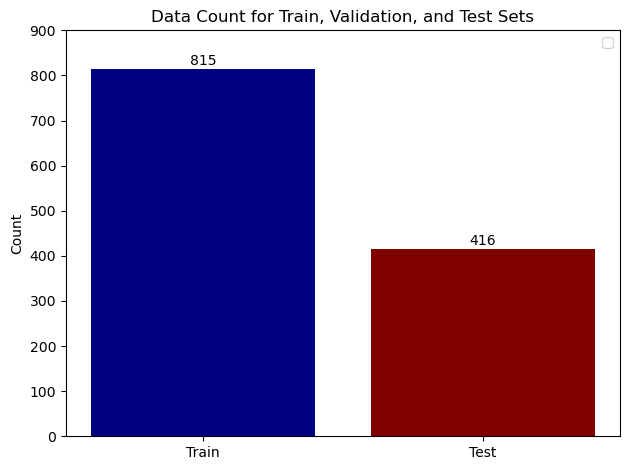

In [70]:
# Data
data_count = [815,416]
labels = ['Train', 'Test']

# Create a color map from 'inferno'
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, len(data_count)))

# Create barplot
fig, ax = plt.subplots()
bars = ax.bar(labels, data_count, color=colors)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom')

# Set y-axis limit
ax.set_ylim(0, 900)

# Add title and labels
ax.set_title('Data Count for Train, Validation, and Test Sets')
ax.set_ylabel('Count')

# Show plot
plt.tight_layout()
plt.legend()
plt.show()

In [71]:
# train dataset
for images, labels in train_data.take(1):
    print(f"images for each batches: {labels.shape}")

images for each batches: (16,)


## Data Augmentation

In [72]:
# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.7),
    tf.keras.layers.RandomContrast(0.7),
])

In [73]:
# Apply data augmentation to the training dataset
augmented_train = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))

## Data Normalization

In [74]:
# Normalize the images
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [75]:
# Apply data normalization to the training dataset
normalized_train = augmented_train.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_data.map(lambda x, y: (normalization_layer(x), y))
normalized_test = test_data.map(lambda x, y: (normalization_layer(x), y))

In [76]:
# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
normalized_train = normalized_train.prefetch(buffer_size=AUTOTUNE)
normalized_val = normalized_val.prefetch(buffer_size=AUTOTUNE)
normalized_test = normalized_test.prefetch(buffer_size=AUTOTUNE)

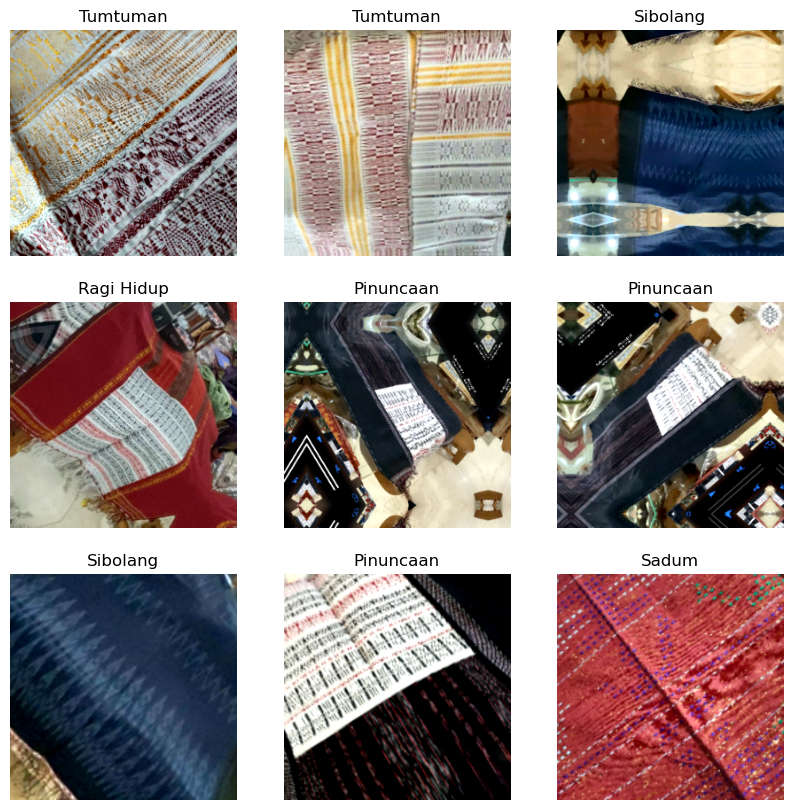

In [77]:
# Visualize some training images
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in normalized_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

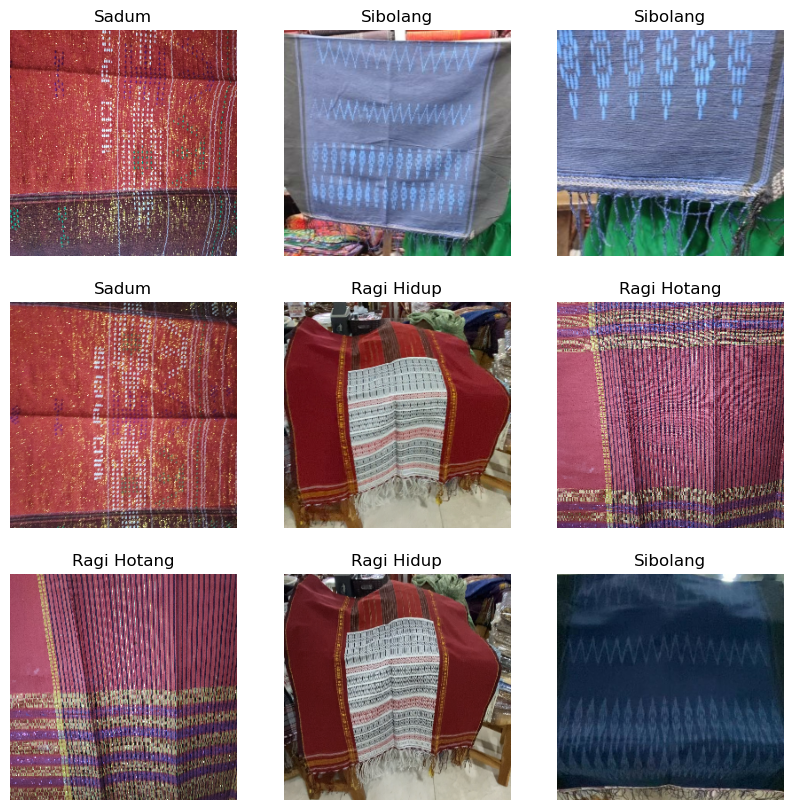

In [78]:
# Visualize some testing images
class_names = test_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in normalized_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## Build Model EfficientNet

In [79]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [80]:
# Input shape
input_shape = (256, 256, 3)

In [81]:
# Load EfficientNetB0 with pretrained weights
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=input_shape)


In [110]:
# Freeze the base model
base_model.trainable = False

In [111]:
# Define num_classes based on the number of classes in your dataset
num_classes = len(class_names)  # Assuming class_names is a list of class labels


# Add classification layers
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)  # Additional regularization
outputs = Dense(num_classes, activation="softmax")(x)

In [112]:
# Build the model
model = Model(inputs, outputs)

In [113]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [114]:
# Menghitung bobot kelas untuk menangani ketidakseimbangan kelas
train_labels = np.concatenate([y.numpy() for x, y in normalized_train])
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}


In [115]:
# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=20, min_delta=0.001, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)


In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data untuk pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [117]:
from sklearn.utils.class_weight import compute_class_weight  # Impor yang hilang

history = model.fit(
    normalized_train,
    validation_data=normalized_val,
    epochs=100,  # Tingkatkan jumlah epoch
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights 
)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.2074 - loss: 1.8305 - val_accuracy: 0.1288 - val_loss: 1.8075 - learning_rate: 1.0000e-04
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1910 - loss: 1.8534 - val_accuracy: 0.1288 - val_loss: 1.7987 - learning_rate: 1.0000e-04
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1460 - loss: 1.8597 - val_accuracy: 0.1288 - val_loss: 1.8020 - learning_rate: 1.0000e-04
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.1713 - loss: 1.8231 - val_accuracy: 0.1288 - val_loss: 1.7974 - learning_rate: 1.0000e-04
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1767 - loss: 1.8150 - val_accuracy: 0.1288 - val_loss: 1.7987 - learning_rate: 1.0000e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.1520 - loss: 1.8528 - val_accuracy: 0.1288 - val_loss: 1.7943 - learning_rate: 1.0000e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1471

# Evaluasi Model

In [120]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(normalized_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 799ms/step - accuracy: 0.1512 - loss: 1.7936
Test Accuracy: 0.16


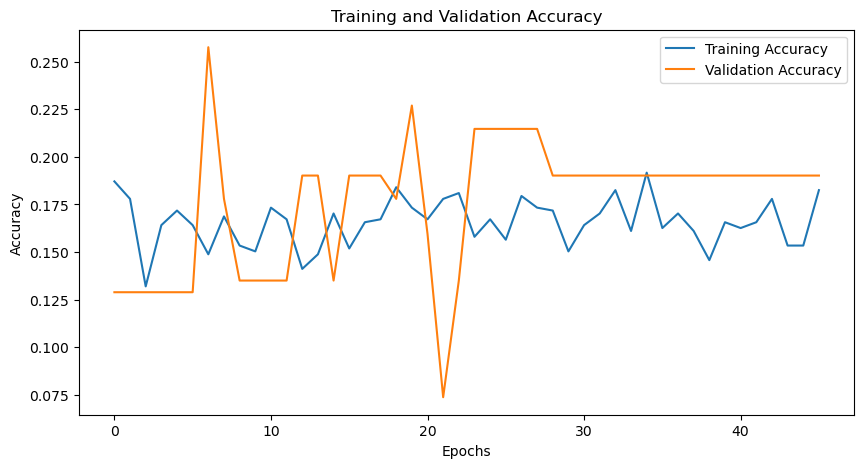

In [121]:
# Plot training and validation accuracy

plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

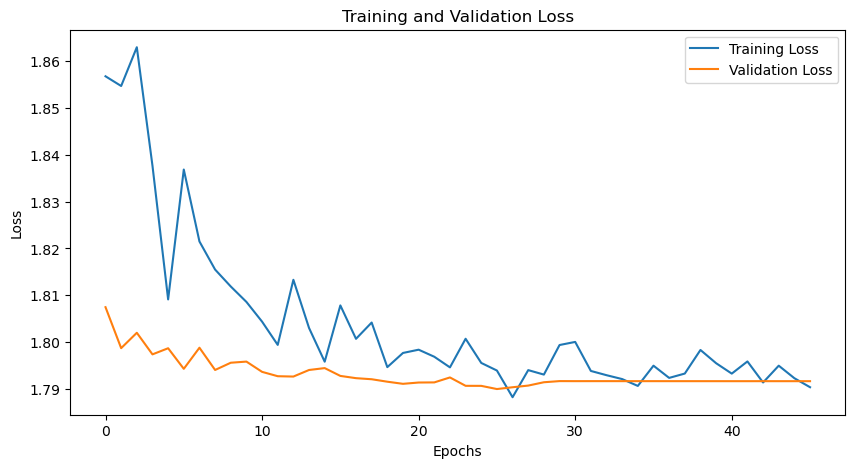

In [122]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()